![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from livelossplot import PlotLossesKeras
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [52]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


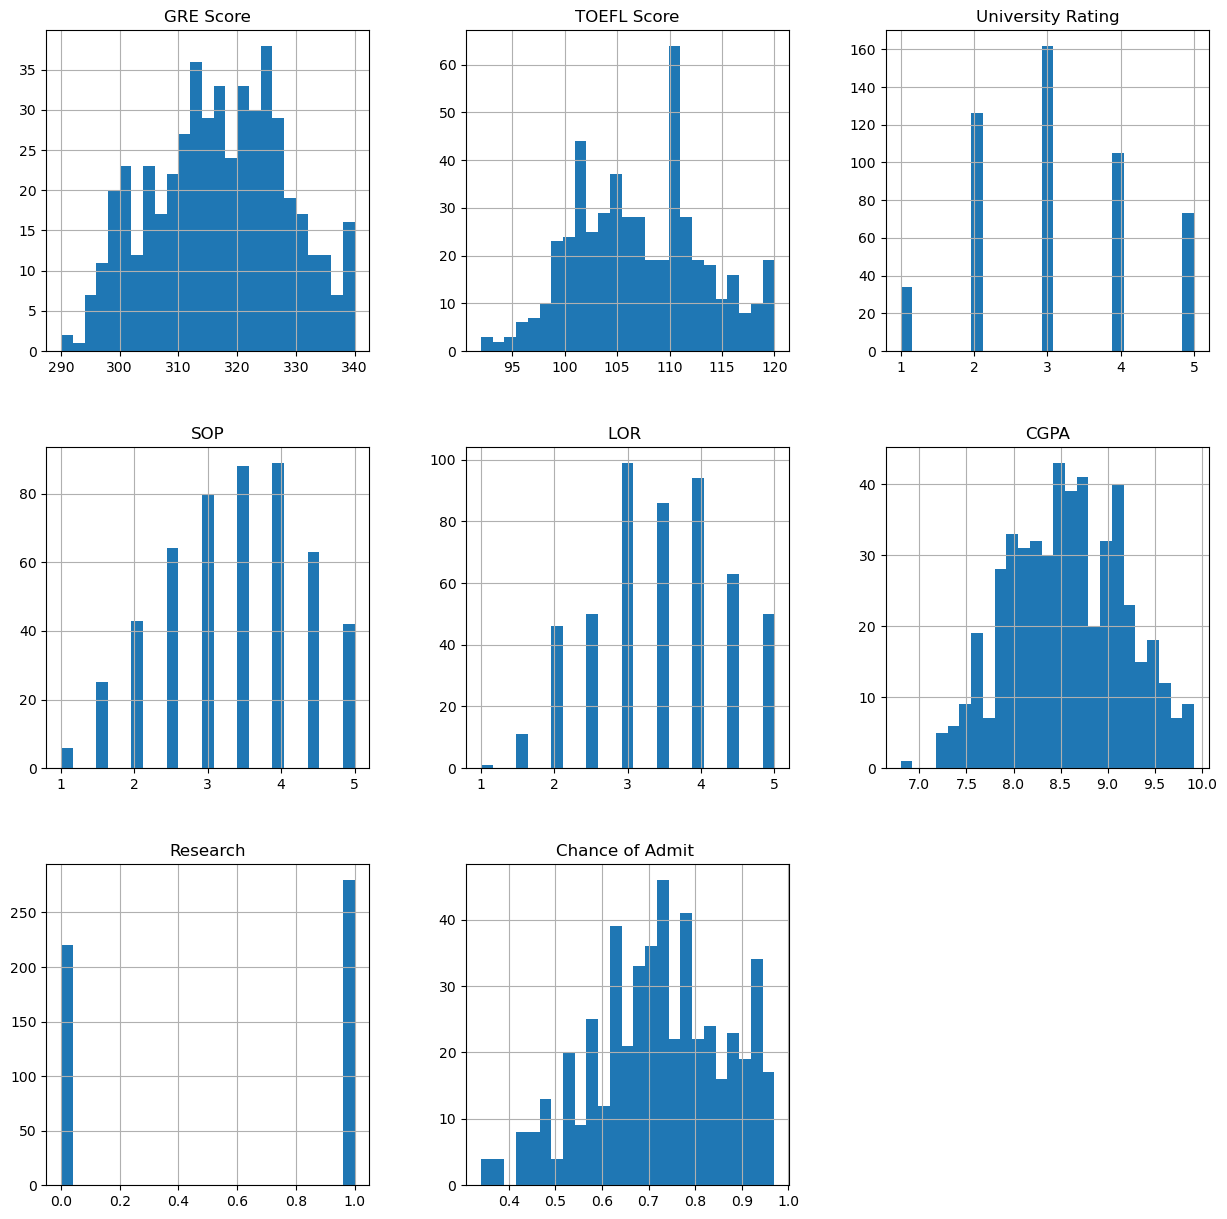

In [53]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [54]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [55]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

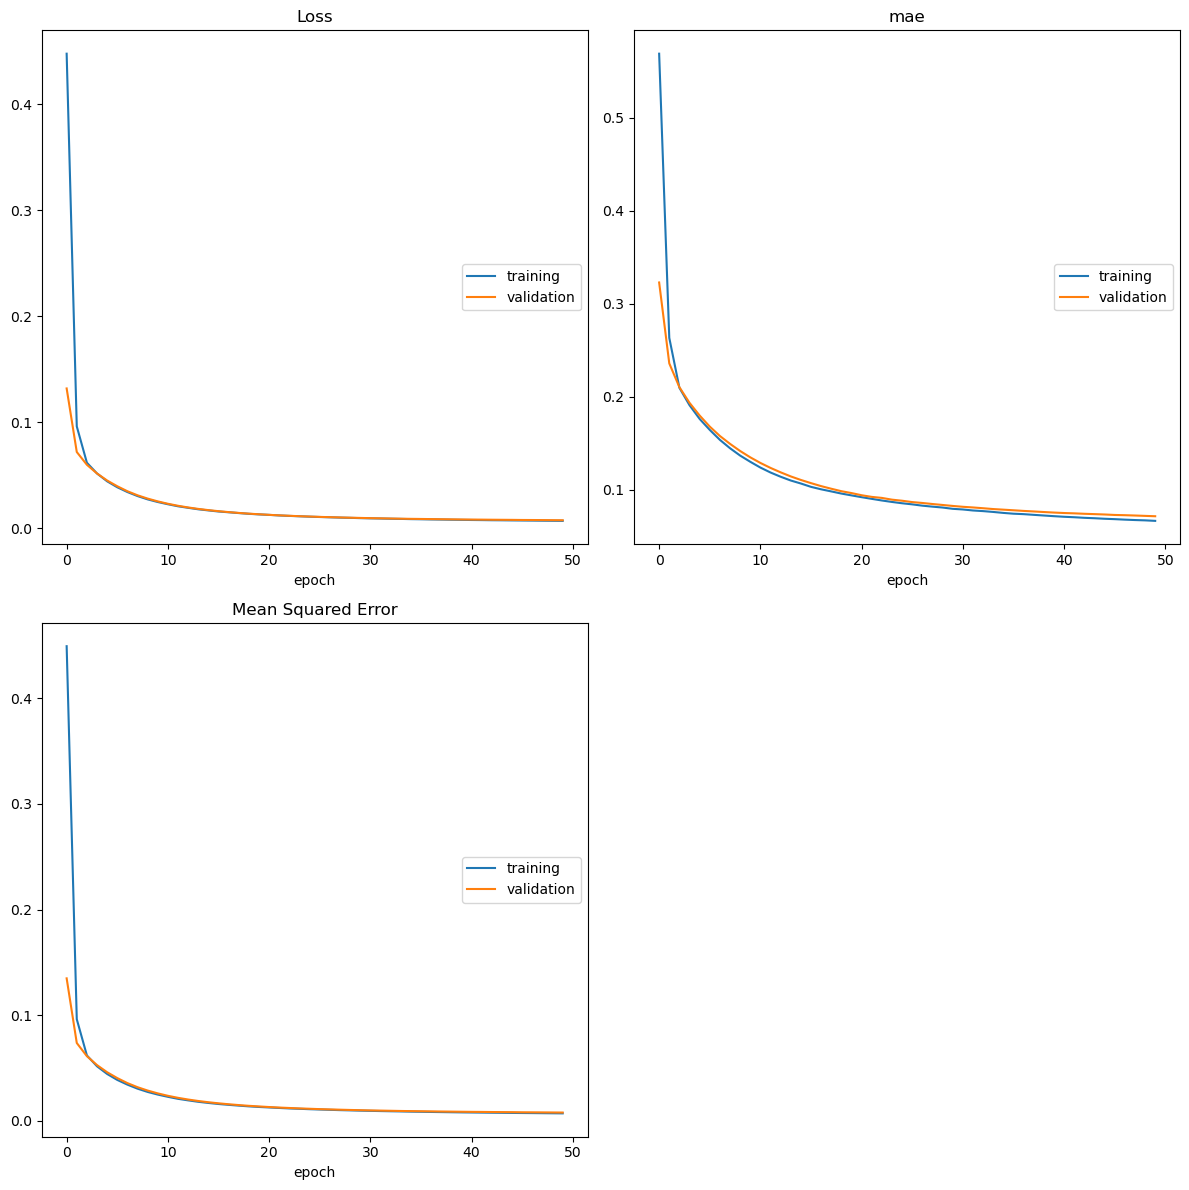

Loss
	training         	 (min:    0.007, max:    0.448, cur:    0.007)
	validation       	 (min:    0.008, max:    0.132, cur:    0.008)
mae
	training         	 (min:    0.067, max:    0.569, cur:    0.067)
	validation       	 (min:    0.072, max:    0.323, cur:    0.072)
Mean Squared Error
	training         	 (min:    0.007, max:    0.449, cur:    0.007)
	validation       	 (min:    0.008, max:    0.135, cur:    0.008)
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0072 - mae: 0.0678 - mse: 0.0072 - val_loss: 0.0076 - val_mae: 0.0717 - val_mse: 0.0077
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01


In [56]:
# Celda 1

# Normalización de variables predictoras (X) con la función StandardScaler
scaler = StandardScaler()
xTrain = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

# Conversión a formato numpy
xTrain = np.array(xTrain)
yTrain = np.array(yTrain)
xTest = np.array(xTest)
yTest = np.array(yTest)

# Creación del modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(xTrain.shape[1],)))
model.add(Dense(1, activation='linear'))

# Compilación del modelo
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae', 'mse'])

# Entrenamiento del modelo con gráficas de pérdida en tiempo real
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()]) # Gráfica de la pérdida del modelo vs número de épocas

# Evaluación del modelo en el set de test
loss, mae, mse = model.evaluate(xTest, yTest, verbose=0)
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))

##### **Justificación de los parámetros**:
Inicialmente, para enseñar al modelo de regresión, **elegimos el optimizador 'sgd' y decidimos utilizar 50 épocas**. Escogimos estos valores por su simplicidad y eficacia en este tipo de problemas. Nos proporcionan un buen punto de partida para el proceso de enseñanza del modelo, y podemos cambiarlos si es necesario para mejorar su desempeño.

En cuanto al optimizador, optamos por 'sgd', que es el descenso de gradiente estocástico. Es una opción simple y efectiva para problemas de regresión. Aunque puede ser más lento que otros optimizadores más avanzados, como Adam, suele ser más confiable en ciertas situaciones y puede evitar quedar atrapado en mínimos locales.

Respecto al número de épocas, decidimos utilizar 50. Consideramos que es un buen punto de partida para observar cómo se comporta la pérdida durante el entrenamiento y la validación. Si la pérdida sigue disminuyendo de manera significativa después de 50 épocas, podría ser útil seguir entrenando por más tiempo. Sin embargo, si la pérdida en el conjunto de validación empieza a aumentar o se estabiliza, podría indicar que el modelo se está sobreajustando y sería apropiado detener el entrenamiento o hacer ajustes en los hiperparámetros.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

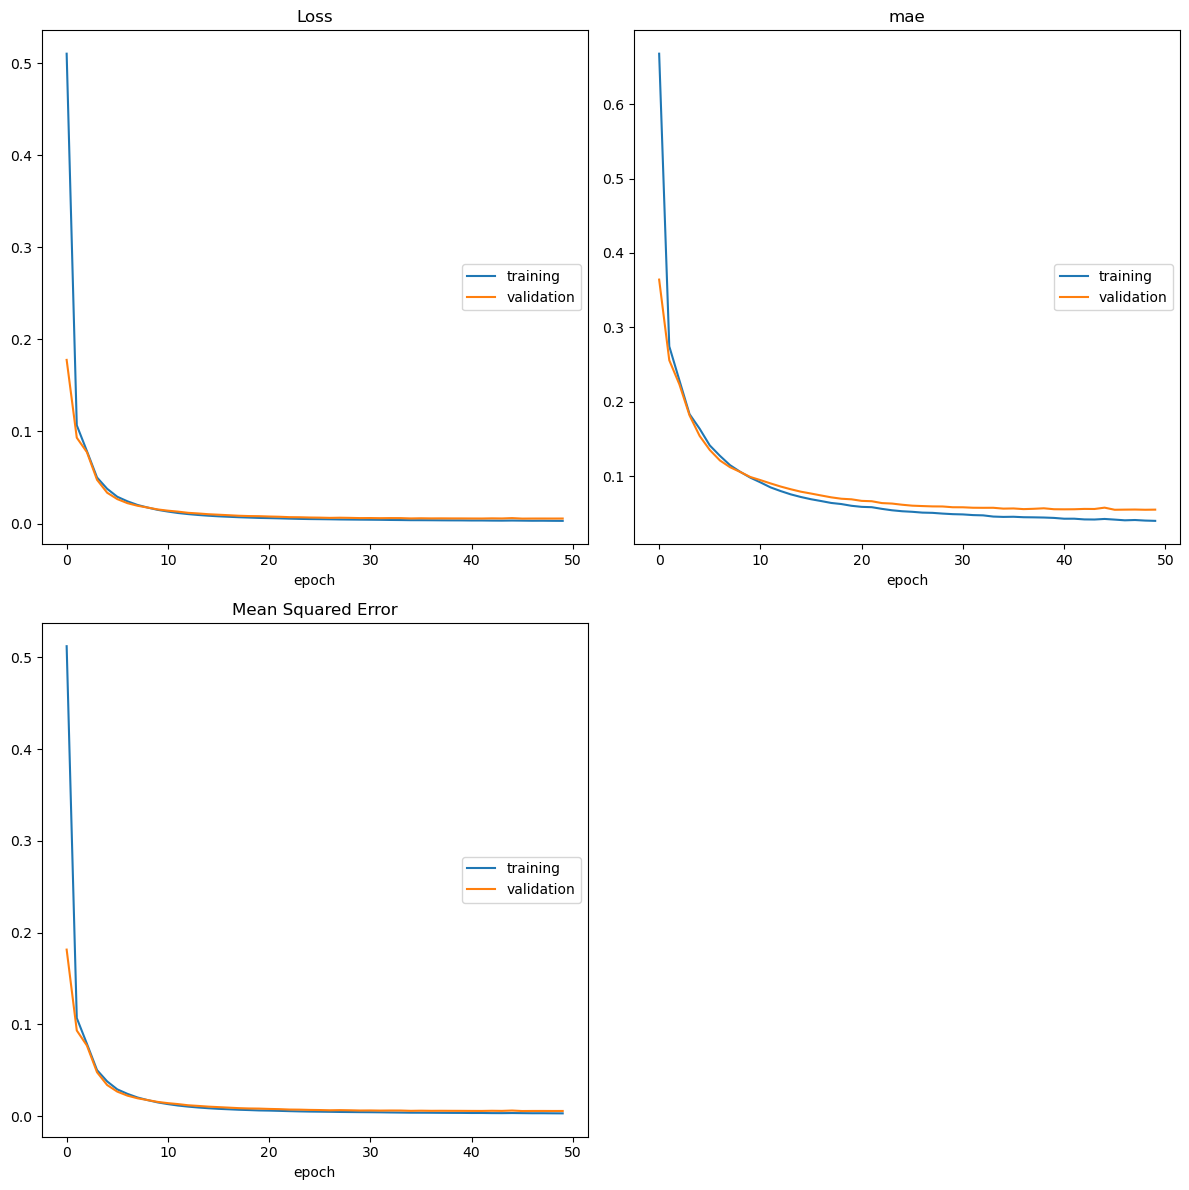

Loss
	training         	 (min:    0.003, max:    0.510, cur:    0.003)
	validation       	 (min:    0.005, max:    0.178, cur:    0.005)
mae
	training         	 (min:    0.040, max:    0.668, cur:    0.040)
	validation       	 (min:    0.055, max:    0.364, cur:    0.055)
Mean Squared Error
	training         	 (min:    0.003, max:    0.512, cur:    0.003)
	validation       	 (min:    0.005, max:    0.181, cur:    0.005)
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0028 - mae: 0.0394 - mse: 0.0028 - val_loss: 0.0054 - val_mae: 0.0554 - val_mse: 0.0055
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01


In [60]:
# Celda 2
# Creación del modelo de red neuronal
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(xTrain.shape[1],))) # Primera capa oculta con 64 neuronas
model.add(Dense(32, activation='relu')) # Segunda capa oculta con 32 neuronas
model.add(Dense(1, activation='linear')) # Capa de salida con una neurona y activación lineal

# Compilación del modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

# Entrenamiento del modelo con gráficas de pérdida en tiempo real
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()]) # Gráfica de la pérdida del modelo vs número de épocas

# Evaluación del modelo en el set de test
loss, mae, mse = model.evaluate(xTest, yTest, verbose=0)
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))

##### **Justificación de los parámetros**

- **Dos capas ocultas:** Se optó por utilizar dos capas ocultas para permitir al modelo aprender representaciones más complejas de los datos. Esto puede ayudar a capturar relaciones no lineales entre las variables predictoras y la variable de respuesta.

- **Número de neuronas en las capas ocultas:** Se seleccionaron 64 y 32 neuronas para las dos capas ocultas, respectivamente. Estos valores se eligieron empíricamente para proporcionar suficiente capacidad de aprendizaje al modelo sin aumentar demasiado la complejidad del mismo. Un número moderado de neuronas en cada capa puede ayudar a evitar el sobreajuste del modelo.

- **Función de pérdida:** Se utilizó la función de pérdida de error cuadrático medio (MSE) ya que estamos tratando con un problema de regresión. Esta función penaliza los errores de predicción de manera cuadrática, lo que es adecuado para problemas de regresión donde se quiere minimizar la diferencia entre las predicciones y los valores reales.

- **Optimizador Adam:** Se eligió el optimizador Adam debido a su eficacia y rapidez en la convergencia, especialmente en problemas de regresión. Adam ajusta las tasas de aprendizaje de forma adaptativa para cada parámetro, lo que lo hace adecuado para una amplia gama de problemas de optimización.

- **Número de épocas:** Se seleccionaron 50 épocas como un valor inicial. Este número se eligió para permitir que el modelo se entrene lo suficiente para aprender patrones en los datos, pero no tanto como para correr el riesgo de sobreajuste. Si la pérdida en el conjunto de validación sigue disminuyendo después de 50 épocas, podríamos considerar entrenar el modelo durante más tiempo. Principalmente se utilizan 50 epocas para hacer una comparación más equitativa frente al modelo anterior de una sola capa.


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [66]:
# Celda 3
# Creación del modelo de red neuronal
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(xTrain.shape[1],))) # Primera capa oculta con 128 neuronas
model.add(Dropout(0.5)) # Dropout para evitar sobreajuste
model.add(Dense(64, activation='relu')) # Segunda capa oculta con 64 neuronas
model.add(Dropout(0.5)) # Dropout para evitar sobreajuste
model.add(Dense(1, activation='linear')) # Capa de salida con una neurona y activación lineal

# Compilación del modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1) 

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.keras'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento de la red neuronal con early stopping y dropout
model.fit(xTrain, yTrain, 
        verbose=True, 
        epochs=50, 
        batch_size=128,
        validation_data=(xTest, yTest),
        callbacks=[best_model, early_stop])

# Evaluación del modelo en el set de test
loss, mae, mse = model.evaluate(xTest, yTest, verbose=0)
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 1.4282 - mae: 1.0964 - mse: 1.4419 - val_loss: 0.6681 - val_mae: 0.7941 - val_mse: 0.6727
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.8387 - mae: 0.8381 - mse: 0.8455 - val_loss: 0.3008 - val_mae: 0.5281 - val_mse: 0.3143
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4637 - mae: 0.5927 - mse: 0.4665 - val_loss: 0.1220 - val_mae: 0.3267 - val_mse: 0.1356
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3049 - mae: 0.4696 - mse: 0.3069 - val_loss: 0.0816 - val_mae: 0.2562 - val_mse: 0.0875
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2470 - mae: 0.4046 - mse: 0.2482 - val_loss: 0.1017 - val_mae: 0.2509 - val_mse: 0.0993
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3414 - mae: 0.4447 - mse: 0.3433 - val_loss: 0.1144 - val_mae: 0.2521 - val_mse: 0.1077
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2737 - mae: 0.4041 - mse: 0.2741 - val_loss: 0.1049 - val_

##### **Justificación de los parámetros del modelo de red neuronal con Dropout y EarlyStopping**

- **Dos capas ocultas con Dropout:** Se optó por utilizar dos capas ocultas con Dropout para prevenir el sobreajuste al eliminar de forma aleatoria algunas neuronas durante el entrenamiento. Esto ayuda a mejorar la generalización del modelo al tiempo que se mantiene la capacidad de aprendizaje.

- **Número de neuronas en las capas ocultas:** Se seleccionaron 128 y 64 neuronas para las dos capas ocultas, respectivamente. Estos valores se eligieron empíricamente para proporcionar suficiente capacidad de aprendizaje al modelo sin aumentar demasiado la complejidad del mismo. Un número moderado de neuronas en cada capa puede ayudar a evitar el sobreajuste del modelo.

- **Función de pérdida:** Se utilizó la función de pérdida de error cuadrático medio (MSE) ya que estamos tratando con un problema de regresión. Esta función penaliza los errores de predicción de manera cuadrática, lo que es adecuado para problemas de regresión donde se quiere minimizar la diferencia entre las predicciones y los valores reales.

- **Optimizador Adam:** Se eligió el optimizador Adam debido a su eficacia y rapidez en la convergencia, especialmente en problemas de regresión. Adam ajusta las tasas de aprendizaje de forma adaptativa para cada parámetro, lo que lo hace adecuado para una amplia gama de problemas de optimización.

- **Número de épocas y EarlyStopping:** Se seleccionaron 50 épocas como un valor inicial para permitir que el modelo se entrene lo suficiente para aprender patrones en los datos. Sin embargo, se utilizó EarlyStopping con paciencia 5 para detener el entrenamiento si la pérdida en el conjunto de validación dejaba de disminuir durante más de 5 épocas consecutivas. Esto ayuda a prevenir el sobreajuste del modelo al detener el entrenamiento cuando la generalización comienza a deteriorarse.


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

##### Modelo 1: Red neuronal de una capa
- **Función de Activación:** ReLU en la capa oculta y lineal en la capa de salida.
- **Optimizador:** SGD (Descenso de Gradiente Estocástico).
- **Función de Pérdida:** Error Cuadrático Medio (MSE).
- **Número de Épocas:** 50.
- **MAE:** 0.07.
- **MSE:** 0.01.

##### Modelo 2: Red neuronal con dos capas
- **Función de Activación:** ReLU en ambas capas ocultas y lineal en la capa de salida.
- **Optimizador:** Adam.
- **Función de Pérdida:** Error Cuadrático Medio (MSE).
- **Número de Épocas:** 50.
- **MAE:** 0.06.
- **MSE:** 0.01.

##### Modelo 3: Red neuronal con dos capas y Dropout, Early Stopping
- **Función de Activación:** ReLU en ambas capas ocultas y lineal en la capa de salida.
- **Optimizador:** Adam.
- **Función de Pérdida:** Error Cuadrático Medio (MSE).
- **Número de Épocas:** Determinado por Early Stopping.
- **Dropout:** 20% en ambas capas ocultas.
- **Early Stopping:** Paciencia de 5 épocas.
- **MAE:** 0.24.
- **MSE:** 0.07.

#### **Análisis Comparativo**:
- Los modelos 1 y 2 tienen un rendimiento bastante similar en términos de MAE y MSE, con valores ligeramente mejores en el modelo 2. Ambos modelos tienen una buena capacidad de predicción con bajos errores absolutos y cuadráticos medios.
- El modelo 3 muestra un desempeño significativamente peor en comparación con los otros dos modelos, con un MAE y MSE mucho más altos. Esto sugiere que la adición de dropout y early stopping puede no haber sido beneficiosa en este caso particular.
  
##### **Ventajas del mejor modelo (modelo 2)**:
- Tiene el menor MAE y MSE entre los tres modelos, lo que indica una mejor capacidad para predecir la probabilidad de admisión de los estudiantes.
- La utilización del optimizador Adam en lugar de SGD puede haber contribuido a una convergencia más rápida y una mejor generalización del modelo.

##### **Desventajas del modelo con menor desempeño (modelo 3)**:
- Tiene un MAE y MSE considerablemente más altos en comparación con los otros modelos, lo que sugiere una capacidad de predicción deficiente.
- La implementación de dropout y early stopping puede haber conducido a una regularización excesiva y una interrupción prematura del entrenamiento, afectando negativamente su desempeño.
